       00:00-06:00 Social  00:00-06:00 Entertainment  \
count            5.000000                   5.000000   
mean            70.000000                  33.800000   
std             31.646485                  24.651572   
min             26.000000                   6.000000   
25%             60.000000                  13.000000   
50%             70.000000                  40.000000   
75%             81.000000                  43.000000   
max            113.000000                  67.000000   

       00:00-06:00 Shopping and Food  00:00-06:00 Productivity and Finance  \
count                        5.00000                              5.000000   
mean                         2.80000                             12.000000   
std                          6.26099                             13.209845   
min                          0.00000                              0.000000   
25%                          0.00000                              0.000000   
50%                        

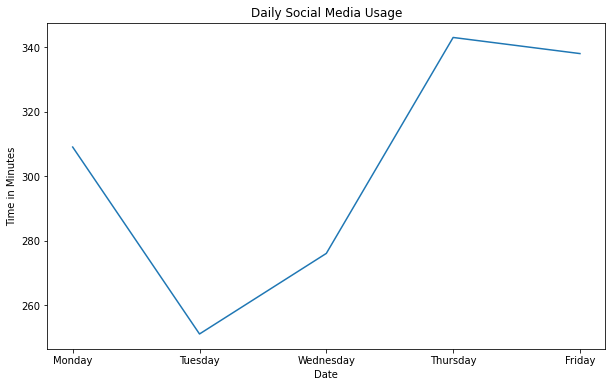

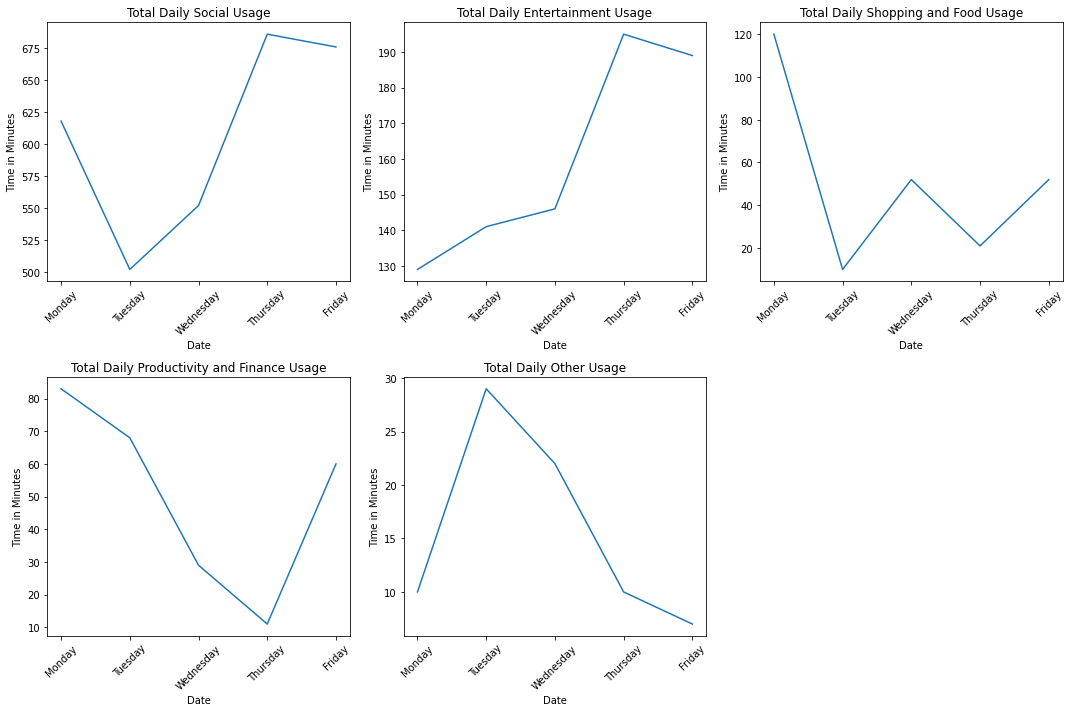

Average usage for Social and Entertainment from 12:00 to 18:00: 87.60 minutes
Average usage for Social and Entertainment from 18:00 to 24:00: 202.40 minutes
The percentage increase in usage after 18:00 is 131.05%


In [14]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def time_to_minutes(time_str):
    if pd.isna(time_str):
        return 0
    hours, minutes = 0, 0
    if 'h' in time_str:
        hours, time_str = time_str.split('h')
        hours = int(hours.strip()) * 60
    if 'min' in time_str:
        minutes = int(time_str.split('min')[0].strip())
    return hours + minutes


weekday_data = {
    'Monday': {
        '00:00-06:00': ('1h 21min', '43min', '14min', '0h', '0h'),
        '06:00-12:00': ('56min', '48min', '36min', '50min', '4min'),
        '12:00-18:00': ('39min', '34min', '20min', '26min', '6min'),
        '18:00-24:00': ('2h 13min', '4min', '50min', '7min', '57sec'),
    }, 'Tuesday': {
        '00:00-06:00': ('26min', '13min', '0min', '32min', '9min'),
        '06:00-12:00': ('33min', '21min', '10min', '15min', '5min'),
        '12:00-18:00': ('1h 6min', '58min', '0min', '20min', '6min'),
        '18:00-24:00': ('2h 6min', '49min', '0min', '1min', '9min'),
    },'Wednesday': {
        '00:00-06:00': ('1h 10min', '1h 7min', '0min', '15min', '2min'),
        '06:00-12:00': ('31min', '3min', '36min', '0min', '2min'),
        '12:00-18:00': ('55min', '32min', '0min', '6min', '6min'),
        '18:00-24:00': ('2h ', '44min', '16min', '8min', '12min'),
    },'Thursday': {
        '00:00-06:00': ('1h 53min', '6min', '0min', '0h', '0h'),
        '06:00-12:00': ('1h 5min', '31min', '21min', '5min', '2min'),
        '12:00-18:00': ('28min', '34min', '0min', '6min', '8min'),
        '18:00-24:00': ('2h 17min', '2h 4min', '0min', '0min', '0min'),
    },'Friday': {
        '00:00-06:00': ('1h', '40min', '0min', '13min', '0h'),
        '06:00-12:00': ('50min', '10min', '25min', '17min', '2min'),
        '12:00-18:00': ('1h 1min', '31min', '27min', '19min', '5min'),
        '18:00-24:00': ('2h 47min', '1h 48min', '0min', '11min', '45sec'),
    }
}

df = pd.DataFrame()


for weekday, periods in weekday_data.items():
    for period, times in periods.items():
        df.at[weekday, period + ' Social'] = time_to_minutes(times[0])
        df.at[weekday, period + ' Entertainment'] = time_to_minutes(times[1])
        df.at[weekday, period + ' Shopping and Food'] = time_to_minutes(times[2])
        df.at[weekday, period + ' Productivity and Finance'] = time_to_minutes(times[3])
        df.at[weekday, period + ' Other'] = time_to_minutes(times[4])

df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

df.head()



descriptive_stats = df.describe()


print(descriptive_stats)




average_screen_time = df.groupby('Date').mean()


print(average_screen_time)


df['Total Social'] = df['00:00-06:00 Social'] + df['06:00-12:00 Social'] + df['12:00-18:00 Social'] + df['18:00-24:00 Social']

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Total Social')
plt.title('Daily Social Media Usage')
plt.ylabel('Time in Minutes')
plt.show()

categories = ['Social', 'Entertainment', 'Shopping and Food', 'Productivity and Finance', 'Other']
for category in categories:
    df['Total ' + category] = df.filter(like=category).sum(axis=1)
    
    
    

plt.figure(figsize=(15, 10))


for i, category in enumerate(categories, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(data=df, x='Date', y='Total ' + category)
    plt.title('Total Daily ' + category + ' Usage')
    plt.xticks(rotation=45) 
    plt.ylabel('Time in Minutes')

plt.tight_layout()  
plt.show()



avg_usage_before_18 = df[['12:00-18:00 Social', '12:00-18:00 Entertainment']].mean().sum()
avg_usage_after_18 = df[['18:00-24:00 Social', '18:00-24:00 Entertainment']].mean().sum()

print(f"Average usage for Social and Entertainment from 12:00 to 18:00: {avg_usage_before_18:.2f} minutes")
print(f"Average usage for Social and Entertainment from 18:00 to 24:00: {avg_usage_after_18:.2f} minutes")


increase_percentage = ((avg_usage_after_18 - avg_usage_before_18) / avg_usage_before_18) * 100
print(f"The percentage increase in usage after 18:00 is {increase_percentage:.2f}%")


